# Chapter 1 - Manim in Jupyter

Working with manim in jupyter notebooks has servel advantages:
* outputs and code are close together
* easy to iterate examples
* easy to try different vairantes of one scene in multiple cells
* computation intensive code can be executed serperately from the scenes
* global Mobjects can be used in multiple scenes.
* more can bee seen in chapter 4

## Simple example

First, we need to import manim

In [1]:
from manim import * 

Manim Community v0.7.0

Now we build up our scene

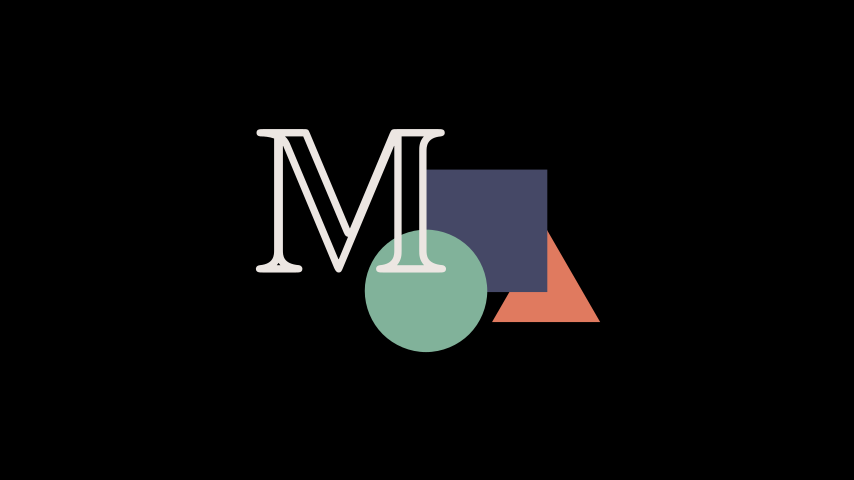

In [2]:
%%manim -v WARNING  --progress_bar None -s -ql --disable_caching MyExample
class MyExample(Scene):
    def construct(self):
        m= ManimBanner()
        self.add(m)

Note, that I use the following parameters:
* `-v WARNING` means that only waringins are shown in the log.  
* `--progress_bar None` will not show the animation progress bar  
* `-s ` will only show the last frame
* `-ql` renders in low quality
* `--disable_caching` will disable the manim caching system
* `MyExample` gives the scenename  

as we will use this qute often, we can define the parameters as a string `params` and call this string by the cell magic with `$params`

In [3]:
params = "-v WARNING  -s -ql  --disable_caching Example"
paramsSMALL =  "-v WARNING -r 400,200 -s  --disable_caching Example"

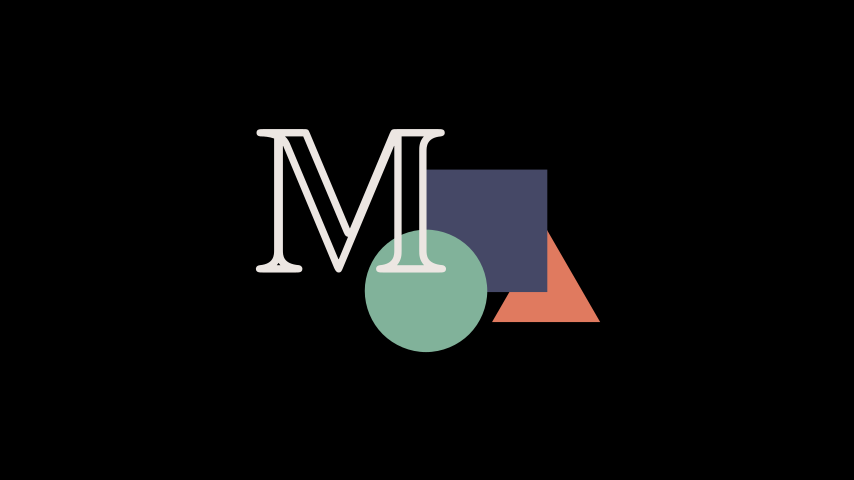

In [4]:
%%manim $params
class Example(Scene):
    def construct(self):
        m= ManimBanner()
        self.add(m)

## Defining Mobjects outside the class
in some cases, it might be convenient to define mobjects outside the `Scene` class (e.g. for decluttering or for speeding up the animation).

In [5]:
m= ManimBanner()

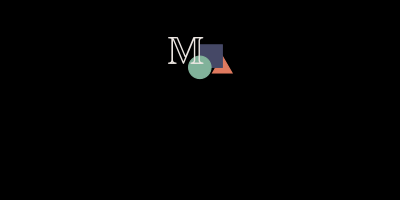

In [6]:
%%manim $paramsSMALL
class Example(Scene):
    def construct(self):
        m.scale(0.4)
        m.shift(1.5*UP)
        self.add(m)

because the mobject is manipulated in the class, the next cell might show some unexpected scaling and shifting:

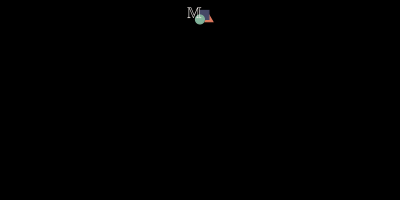

In [7]:
%%manim $paramsSMALL
class Example(Scene):
    def construct(self):
        m.scale(0.4)
        m.shift(1.5*UP)
        self.add(m)

to aviod this, it is better to add only a copy of these mobjects to scenes, and keep the originals untouched:

In [8]:
m_reference= ManimBanner()

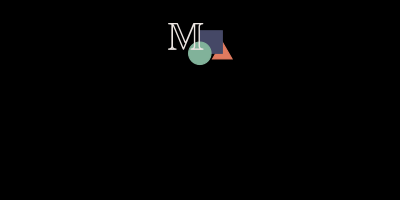

In [9]:
%%manim $paramsSMALL
class Example(Scene):
    def construct(self):
        m = m_reference.copy()
        m.scale(0.4)
        m.shift(2*UP)
        self.add(m)

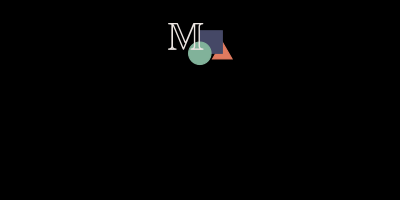

In [10]:
%%manim $paramsSMALL
class Example(Scene):
    def construct(self):
        m = m_reference.copy()
        m.scale(0.4)
        m.shift(2*UP)
        self.add(m)

## Defining global mobjects
When you have build complex scenes, you might want to use parts of that scene for your next scene. That is possible with global variables, which can be acessed in any other scene.

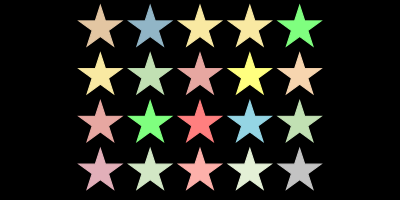

In [44]:
%%manim $paramsSMALL
class Example(Scene):
    def construct(self):
        stars= VGroup()
        for i in range(0,20):
            s= Star(color= random_bright_color(), fill_opacity=1).scale(0.8)
            stars.add(s)
        stars.arrange_in_grid()        
        self.add(stars)
        global favoritstar
        favoritstar = stars[9]

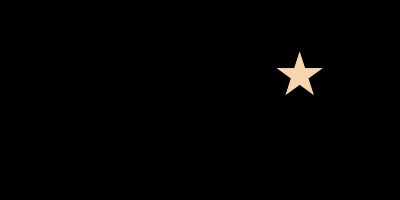

In [46]:
%%manim $paramsSMALL
class Example(Scene):
    def construct(self):
        self.add(favoritstar)

## Pre-execute slow code
In this example, calculating a random walk for 500 particles and 100000 steps takes about 4 seconds.  
This step can be done before the actual scene construction, which takes about 0.2 seconds.  
Making aestetic changes to the scene will then become easier.

In [52]:
%%time
np.random.seed(20)
steps = np.random.choice(a=[-1, 0, 1], size=(100000,1000))
stop = steps.cumsum(0)
end_points= stop[-1]/stop[-1].max() 
end_pointsX = end_points[0:499]
end_pointsY = end_points[500:-1]

CPU times: user 3.4 s, sys: 689 ms, total: 4.09 s
Wall time: 4.14 s


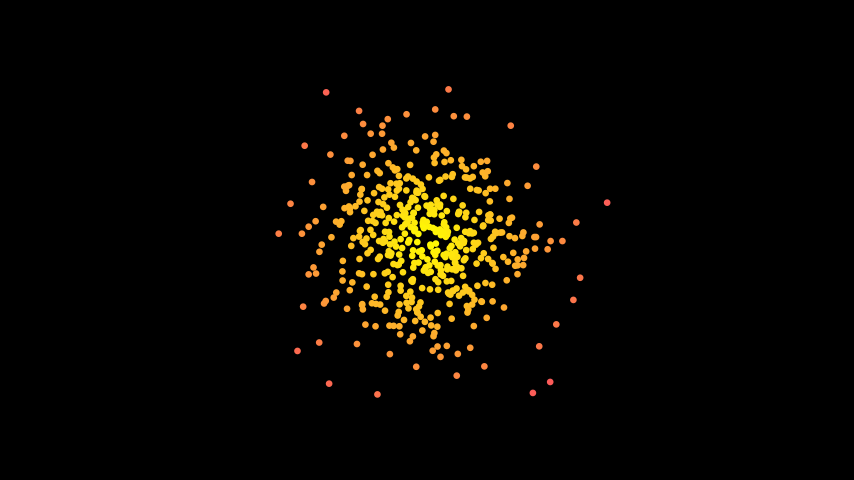

CPU times: user 390 ms, sys: 16.1 ms, total: 406 ms
Wall time: 404 ms


In [53]:
%%time
%%manim $params
class Example(Scene):
    def construct(self):
        radius= (end_pointsX*end_pointsX + end_pointsY * end_pointsY)**0.5
        dots = VGroup()
        for  x,y,r in zip(end_pointsX, end_pointsY,radius):
            c= interpolate_color(YELLOW, RED, r)
            dots.add(Dot(color=c,point=[3*x,3*y,0]).scale(0.7))
        self.add(dots)